In [ ]:
#Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**0) Concatenate data**

We start by concatenating the data, as we had it in two CSV files.

In [ ]:

df = pd.read_csv(r"root1.csv")
df2 = pd.read_csv(r"root2.csv")

df3 = pd.concat([df, df2], ignore_index=True)

#We save the concatenated data
df3.to_csv(r"root_concat.csv")

In [4]:
#We declare the df variable again to match the unified version of the data and facilitate the workflow.
df = pd.read_csv(r"root_caoncat.csv")

**1 ) Exploring data structure**

We used df.info() and df.head(10) to quickly understand the structure and quality of the data. We observed that the number of null values was very low. However, we verified this by visualizing the null values with a heatmap using Seaborn

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78737 entries, 0 to 78736
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            78737 non-null  int64 
 1   coo_id          78737 non-null  int64 
 2   coo_name        78737 non-null  object
 3   coo             78737 non-null  object
 4   coo_iso         78737 non-null  object
 5   coa_id          78737 non-null  int64 
 6   coa_name        78737 non-null  object
 7   coa             78737 non-null  object
 8   coa_iso         78737 non-null  object
 9   procedure_type  78737 non-null  object
 10  app_type        78558 non-null  object
 11  dec_level       77512 non-null  object
 12  app_pc          78737 non-null  object
 13  applied         78737 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 8.4+ MB


In [14]:
df.head(10)

,year,coo_id,coo_name,coo,coo_iso,coa_id,coa_name,coa,coa_iso,procedure_type,app_type,dec_level,app_pc,applied
0,2010,2,Afghanistan,AFG,AFG,11,Australia,AUL,AUS,G,A,AR,C,14
1,2010,3,Albania,ALB,ALB,11,Australia,AUL,AUS,G,A,AR,C,9
2,2010,8,Egypt,ARE,EGY,11,Australia,AUL,AUS,G,A,AR,C,86
3,2010,14,Bahrain,BAH,BHR,11,Australia,AUL,AUS,G,A,AR,C,5
4,2010,20,Bangladesh,BGD,BGD,11,Australia,AUL,AUS,G,A,AR,C,42
5,2010,32,Cambodia,CAM,KHM,11,Australia,AUL,AUS,G,A,AR,C,5
6,2010,37,China,CHI,CHN,11,Australia,AUL,AUS,G,A,AR,C,802
7,2010,39,Cameroon,CMR,CMR,11,Australia,AUL,AUS,G,A,AR,C,5
8,2010,44,Colombia,COL,COL,11,Australia,AUL,AUS,G,A,AR,C,15
9,2010,58,Ethiopia,ETH,ETH,11,Australia,AUL,AUS,G,A,AR,C,14


year                 0
coo_id               0
coo_name             0
coo                  0
coo_iso              0
coa_id               0
coa_name             0
coa                  0
coa_iso              0
procedure_type       0
app_type           179
dec_level         1225
app_pc               0
applied              0
dtype: int64


<Axes: >

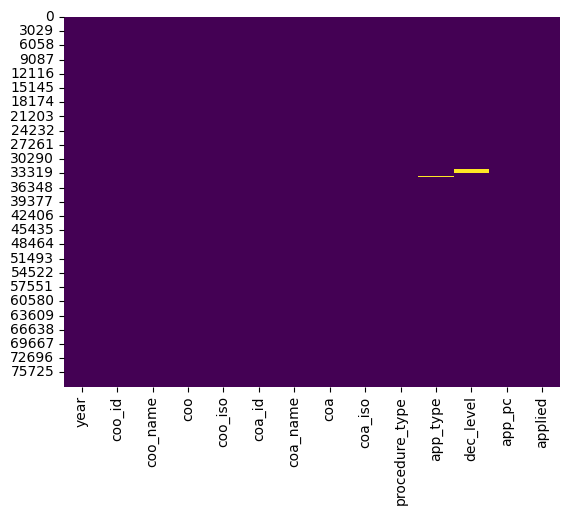

In [22]:
#Summary of null values by column
print(df.isnull().sum())

#Visualization of null values using Seaborn
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")

**2) Exploring the values**

Since the goal is to identify the values that need to be transformed before moving on to analysis in PowerBI, we will perform an identification of the values in each column.

In [21]:
# We verify that we have all the years needed for the analysis
df["year"].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023, 2024], dtype=int64)

In [25]:
# We check the countries of origin (coo) and countries of asylum (coa)
print(df["coo_name"].unique())
print(df["coa_name"].unique())

['Afghanistan' 'Albania' 'Egypt' 'Bahrain' 'Bangladesh' 'Cambodia' 'China'
 'Cameroon' 'Colombia' 'Ethiopia' 'Fiji' 'Palestinian' 'Ghana' 'India'
 'Indonesia' 'Iran (Islamic Rep. of)' 'Iraq' 'Israel' 'Jordan' 'Kenya'
 'Rep. of Korea' "Dem. People's Rep. of Korea" 'Kuwait' 'Liberia'
 'Lebanon' 'Sri Lanka' 'Malaysia' 'Mongolia' 'Myanmar' 'Nepal' 'Nigeria'
 'New Zealand' 'Pakistan' 'Peru' 'Philippines' 'Papua New Guinea'
 'South Africa' 'Russian Federation'
 'Serbia and Kosovo: S/RES/1244 (1999)' 'Singapore' 'Viet Nam'
 'Syrian Arab Rep.' 'United Rep. of Tanzania' 'Thailand' 'Tonga' 'Türkiye'
 'Ukraine' 'Uzbekistan' 'Zimbabwe' 'Stateless' 'Algeria' 'Angola'
 'Armenia' 'Azerbaijan' 'Burundi' 'Benin' 'Bhutan' 'Belarus'
 'Bolivia (Plurinational State of)' 'Botswana' 'Brazil' 'Chad' 'Congo'
 'Dem. Rep. of the Congo' 'Djibouti' 'Ecuador' 'Eritrea' 'Gambia'
 'Georgia' 'Grenada' 'Guinea' 'Guyana' "Cote d'Ivoire" 'Jamaica'
 'Kyrgyzstan' 'Libya' 'Mexico' 'Mali' 'Malawi' 'Morocco' 'Mauritius'
 'Nam

In [ ]:
#We check unique values in procedure_type, app_type, dec_level and app_pc
print("Procedure values:" , df["procedure_type"].unique())
print("Application type values:" , df["app_type"].unique())
print("Decision level values:" , df["dec_level"].unique())
print("Person/cases values:" , df["app_pc"].unique())

Procedure values: ['G' 'J' 'U']
Application type values: ['A' 'FA' 'J' 'N' nan 'NR' 'R' 'SP' 'RA']
Decision level values: ['AR' 'EO' 'FA' 'FI' 'JR' 'RA' 'SP' 'IN' nan 'TA']
Person/cases values: ['C' 'P']


**3) TRANSFORMING DATA**

Based on the UNHCR API docummentation, we proceed to transform the data.

In [29]:
# Changing column names
def rename_columns(df):
    # Dictionary with new column names
    column_mapping = {
        'year': 'Year',
        'coo_id': 'Country of Origin ID',
        'coo_name': 'Country of Origin Name',
        'coo': 'Country of Origin',
        'coo_iso': 'Country of Origin ISO',
        'coa_id': 'Country of Asylum ID',
        'coa_name': 'Country of Asylum Name',
        'coa': 'Country of Asylum',
        'coa_iso': 'Country of Asylum ISO',
        'procedure_type': 'Procedure Type',
        'app_type': 'Application Type',
        'dec_level': 'Decision Level',
        'app_pc': 'Application PC',
        'applied': 'Applied'
    }
    
    # Renaming columns
    df = df.rename(columns=column_mapping)
    
    return df

# Use the function to rename the columns of df
df = rename_columns(df)

# Check the changes
df.head()


# Mapping dictionaries for the columns
mappings = {
    "Procedure Type": {
        "G": "Government",
        "J": "Joint",
        "U": "UNHCR"
    },
    "Application Type": {
        "N": "New applications",
        "R": "Repeat applications",
        "A": "Appeal applications",
        "NA": "New and appeal applications",
        "NR": "New and repeat applications",
        "FA": "First and appeal applications",
        "J": "Judiciary",
        "BL": "Backlog",
        "SP": "Subsidiary protection"
    },
    "Decision Level": {
        "NA": "New Applications",
        "FI": "First instance decisions",
        "AR": "Administrative Review decisions",
        "RA": "Repeat/reopened applications",
        "IN": "US Citizenship and Immigration Services",
        "EO": "US Executive Office of Immigration Review",
        "JR": "Judicial Review",
        "SP": "Subsidiary protection",
        "FA": "First instance and appeal",
        "TP": "Temporary protection",
        "TA": "Temporary asylum",
        "BL": "Backlog",
        "TR": "Temporary leave to remain outside the asylum procedure",
        "CA": "Cantonal regulations in Switzerland"
    },
    "Application PC": {
        "P": "Persons",
        "C": "Cases"
    }
}

# Optimized function to map values
def map_column_values(df):
    for col, mapping in mappings.items():
        df[col] = df[col].replace(mapping)
    return df

# Apply the function to the df DataFrame
df = map_column_values(df)

# Verify the result
df.head()


,Year,Country of Origin ID,Country of Origin Name,Country of Origin,Country of Origin ISO,Country of Asylum ID,Country of Asylum Name,Country of Asylum,Country of Asylum ISO,Procedure Type,Application Type,Decision Level,Application PC,Applied
0,2010,2,Afghanistan,AFG,AFG,11,Australia,AUL,AUS,Government,Appeal applications,Administrative Review decisions,Cases,14
1,2010,3,Albania,ALB,ALB,11,Australia,AUL,AUS,Government,Appeal applications,Administrative Review decisions,Cases,9
2,2010,8,Egypt,ARE,EGY,11,Australia,AUL,AUS,Government,Appeal applications,Administrative Review decisions,Cases,86
3,2010,14,Bahrain,BAH,BHR,11,Australia,AUL,AUS,Government,Appeal applications,Administrative Review decisions,Cases,5
4,2010,20,Bangladesh,BGD,BGD,11,Australia,AUL,AUS,Government,Appeal applications,Administrative Review decisions,Cases,42


In [ ]:
#We save the final data
df.to_csv(r"root_finalversion.csv")